In [49]:
import numpy as np

In [50]:
import pandas as pd

In [51]:
from neobase import NeoBase

In [52]:
from datetime import datetime

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
b = NeoBase()
#https://pypi.org/project/NeoBase/

In [55]:
!cat searches_m.csv | wc -l

20390198


In [56]:
!cat bookings_m.csv | wc -l

10000011


In [57]:
def getCityName(x):
    return b.get(x.strip(),'city_name_list')[0]

In [58]:
bo = pd.read_csv("bookings_m.csv",sep="^",nrows=10000)

In [59]:
bo.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [69]:
#Top 10 Arrival Airports
top10 = bo.groupby('arr_port')['pax'].sum().sort_values(ascending=False).head(10)
top10.to_frame()

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
SFO,91
LAX,91
MCO,90
DCA,82
DEN,79


In [70]:
cities = list(map(getCityName,top10.index));
cities

['Hong Kong',
 'New York City',
 'Chicago',
 'New York City',
 'San Francisco',
 'Los Angeles',
 'Orlando',
 'Washington, D.C.',
 'Denver',
 'London']

In [71]:
top10.index = cities

In [72]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
top10_final = top10.to_frame().rename(columns={'pax':'Passengers'})
top10_final

,Passengers
Hong Kong,112
New York City,95
Chicago,94
New York City,92
San Francisco,91
Los Angeles,91
Orlando,90
"Washington, D.C.",82
Denver,79
London,76


In [73]:
#se.set_index(se["date_minus_time"],inplace=True)

# Ejercicio 2

In [75]:
se = pd.read_csv("searches_m.csv",sep="^",nrows=50000)
se.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [76]:
#Pasamos la fecha a objeto tipo datetime
se["Date"] = pd.to_datetime(se["Date"],format='%Y-%m-%d')

In [92]:
#Reseteamos la fecha a YYY-mm-01
se['Date'].apply(lambda x: datetime(year=x.year, month=x.month, day=1))

0       2013-01-01
1       2013-01-01
2       2013-01-01
3       2013-01-01
4       2013-01-01
           ...    
49995   2013-02-01
49996   2013-02-01
49997   2013-02-01
49998   2013-02-01
49999   2013-02-01
Name: Date, Length: 50000, dtype: datetime64[ns]

In [93]:
#https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
#Hacemos group by por destino y fecha, haciendo un count
all_destination_counts = se.groupby(['Destination','Date']).size().reset_index(name='counts')
all_destination_counts

,Destination,Date,counts
0,AAE,2013-01-27,1
1,AAE,2013-02-03,1
2,AAE,2013-02-13,1
3,AAL,2013-01-05,1
4,AAL,2013-01-07,1
...,...,...,...
18835,ZVJ,2013-01-19,1
18836,ZWS,2013-01-17,1
18837,ZWS,2013-01-21,1
18838,ZYL,2013-01-06,1


In [94]:
#Nos quedamos con Barcelona
destinations_BCN = all_destination_counts[all_destination_counts['Destination']=='BCN']
#destinations_BCN

In [95]:
#Nos quedamos con Madrid
destinations_MAD = all_destination_counts[all_destination_counts['Destination']=='MAD']
#destinations_MAD

In [96]:
#Nos quedamos con Malaga
destinations_AGP = all_destination_counts[all_destination_counts['Destination']=='AGP']

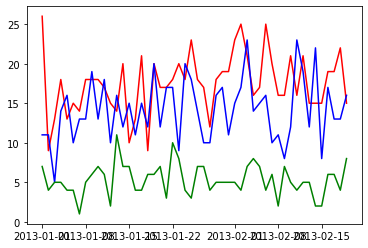

In [86]:
plt.plot(destinations_BCN['Date'], destinations_BCN['counts'],color="red");
plt.plot(destinations_MAD['Date'], destinations_MAD['counts'],color="blue");
plt.plot(destinations_AGP['Date'], destinations_AGP['counts'],color="green");

In [48]:
#list(map(getCityName,destinations_BCN['Destination']))

In [442]:
#b.get('AGP', 'city_name_list')